In [89]:
import numpy as np
import pandas as pd 
import os
import warnings
warnings.filterwarnings('ignore')

In [90]:
ratings_full_df = pd.read_csv('./kaggle/input/movie-recommendation-system/ratings.csv')
movies_df = pd.read_csv('./kaggle/input/movie-recommendation-system/movies.csv')

In [123]:
ratings_full_df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [92]:
ratings_df = ratings_full_df[:200000]
ratings_df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
199995,1409,48516,4.0,1287843475
199996,1409,48696,4.0,1287854818
199997,1409,48738,3.5,1287854109
199998,1409,48774,4.0,1287849077


In [93]:
mean_user_ratings = ratings_full_df.groupby("userId")["rating"].mean()
mean_user_ratings

userId
1         3.814286
2         3.630435
3         3.697409
4         3.378099
5         3.752475
            ...   
162537    4.039604
162538    3.415584
162539    4.510638
162540    3.829545
162541    3.365385
Name: rating, Length: 162541, dtype: float64

In [94]:
ratings_df = ratings_df.merge(mean_user_ratings, how="left", on="userId", suffixes=("", "_user_mean"))
ratings_df

,userId,movieId,rating,timestamp,rating_user_mean
0,1,296,5.0,1147880044,3.814286
1,1,306,3.5,1147868817,3.814286
2,1,307,5.0,1147868828,3.814286
3,1,665,5.0,1147878820,3.814286
4,1,899,3.5,1147868510,3.814286
...,...,...,...,...,...
199995,1409,48516,4.0,1287843475,3.043624
199996,1409,48696,4.0,1287854818,3.043624
199997,1409,48738,3.5,1287854109,3.043624
199998,1409,48774,4.0,1287849077,3.043624


In [95]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


### Добавим к movies средний рейтинг

In [96]:
mean_movie_ratings = ratings_full_df.groupby("movieId")["rating"].mean()
mean_movie_ratings

movieId
1         3.893708
2         3.251527
3         3.142028
4         2.853547
5         3.058434
            ...   
209157    1.500000
209159    3.000000
209163    4.500000
209169    3.000000
209171    3.000000
Name: rating, Length: 59047, dtype: float64

In [97]:
movies_df = movies_df.merge(mean_movie_ratings, how="left", on="movieId").rename({"rating":"ratings_movie_mean"}, axis=1)
movies_df

,movieId,title,genres,ratings_movie_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434
...,...,...,...,...
62418,209157,We (2018),Drama,1.500000
62419,209159,Window of the Soul (2001),Documentary,3.000000
62420,209163,Bad Poems (2018),Comedy|Drama,4.500000
62421,209169,A Girl Thing (2001),(no genres listed),3.000000


### Обработаем таблицу с рейтингами

In [98]:
datetimes = pd.to_datetime(ratings_df['timestamp'], unit='s')

ratings_df['year'] = datetimes.dt.year
ratings_df['month'] = datetimes.dt.month
ratings_df['day'] = datetimes.dt.day
ratings_df['day_of_week'] = datetimes.dt.dayofweek
ratings_df['hour'] = datetimes.dt.hour

def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

ratings_df['part_of_day'] = ratings_df['hour'].apply(get_part_of_day)

ratings_df = pd.get_dummies(ratings_df, columns=['part_of_day'], prefix='time')

ratings_df = ratings_df.drop(columns=['timestamp'])
ratings_df.head(2)

,userId,movieId,rating,rating_user_mean,year,month,day,day_of_week,hour,time_afternoon,time_evening,time_morning,time_night
0,1,296,5.0,3.814286,2006,5,17,2,15,True,False,False,False
1,1,306,3.5,3.814286,2006,5,17,2,12,True,False,False,False


In [99]:
genres_list = movies_df['genres'].apply(lambda x: x.split('|'))
genres_list

0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
62418                                              [Drama]
62419                                        [Documentary]
62420                                      [Comedy, Drama]
62421                                 [(no genres listed)]
62422                           [Action, Adventure, Drama]
Name: genres, Length: 62423, dtype: object

In [100]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(genres_list)
list(mlb.classes_)

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [101]:
mlb.transform(genres_list)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [102]:
genre_encoded = pd.DataFrame(mlb.transform(genres_list),
                             columns=mlb.classes_,
                             index=movies_df.index)
genre_encoded.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
movies_encoded = pd.concat([movies_df.drop("genres", axis=1), genre_encoded], axis=1)
movies_encoded.head()

,movieId,title,ratings_movie_mean,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),3.893708,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),3.251527,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),3.142028,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),2.853547,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),3.058434,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df = ratings_df.merge(movies_encoded, how="left", on="movieId")
df

,userId,movieId,rating,rating_user_mean,year,month,day,day_of_week,hour,time_afternoon,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,296,5.0,3.814286,2006,5,17,2,15,True,...,0,0,0,0,0,0,0,1,0,0
1,1,306,3.5,3.814286,2006,5,17,2,12,True,...,0,0,0,0,0,0,0,0,0,0
2,1,307,5.0,3.814286,2006,5,17,2,12,True,...,0,0,0,0,0,0,0,0,0,0
3,1,665,5.0,3.814286,2006,5,17,2,15,True,...,0,0,0,0,0,0,0,0,1,0
4,1,899,3.5,3.814286,2006,5,17,2,12,True,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1409,48516,4.0,3.043624,2010,10,23,5,14,True,...,0,0,0,0,0,0,0,1,0,0
199996,1409,48696,4.0,3.043624,2010,10,23,5,17,False,...,0,0,0,0,0,1,0,0,0,0
199997,1409,48738,3.5,3.043624,2010,10,23,5,17,False,...,0,0,0,0,0,0,0,1,0,0
199998,1409,48774,4.0,3.043624,2010,10,23,5,15,True,...,0,0,0,0,0,0,1,1,0,0


In [105]:
mean_genres_by_users = pd.concat(
    [
        df["userId"], 
        df[list(mlb.classes_)].multiply(df['rating'],axis=0)
    ], axis=1
).groupby("userId").mean()
df = df.merge(mean_genres_by_users, how="left", on="userId", suffixes=("", "_mean_gen"))

In [106]:
df

,userId,movieId,rating,rating_user_mean,year,month,day,day_of_week,hour,time_afternoon,...,Film-Noir_mean_gen,Horror_mean_gen,IMAX_mean_gen,Musical_mean_gen,Mystery_mean_gen,Romance_mean_gen,Sci-Fi_mean_gen,Thriller_mean_gen,War_mean_gen,Western_mean_gen
0,1,296,5.0,3.814286,2006,5,17,2,15,True,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
1,1,306,3.5,3.814286,2006,5,17,2,12,True,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
2,1,307,5.0,3.814286,2006,5,17,2,12,True,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
3,1,665,5.0,3.814286,2006,5,17,2,15,True,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
4,1,899,3.5,3.814286,2006,5,17,2,12,True,...,0.050000,0.050000,0.000000,0.264286,0.200000,1.071429,0.264286,0.307143,0.278571,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1409,48516,4.0,3.043624,2010,10,23,5,14,True,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471
199996,1409,48696,4.0,3.043624,2010,10,23,5,17,False,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471
199997,1409,48738,3.5,3.043624,2010,10,23,5,17,False,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471
199998,1409,48774,4.0,3.043624,2010,10,23,5,15,True,...,0.020499,0.068627,0.045455,0.059715,0.199643,0.514260,0.340463,0.899287,0.386809,0.176471


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["rating", "title"], axis=1), df["rating"], test_size=0.2, random_state=41)

### Рекомендации на основе схожих пользователей

In [108]:
def get_most_popular_rating(X_train, y_train, X_test, userId, movieId):
    movie_data = X_train[X_train["movieId"] == movieId]   
    if movie_data.empty:
        return y_train.mean()
    else:
        return movie_data.iloc[0]["ratings_movie_mean"]

In [109]:
predict = [get_most_popular_rating(X_train, y_train, X_test, userId, movieId) for userId, movieId in zip(X_test["userId"], X_test["movieId"])]
predict

[np.float64(3.313294400549639),
 np.float64(3.6417839310031774),
 np.float64(4.009751032903046),
 np.float64(4.002272573668559),
 np.float64(1.6636904761904763),
 np.float64(2.7335646140503034),
 np.float64(3.9223771740001605),
 np.float64(3.4570565520677627),
 np.float64(3.225112556278139),
 np.float64(4.138093788063338),
 np.float64(3.2022292993630574),
 np.float64(3.902317880794702),
 np.float64(3.287068546426835),
 np.float64(3.80918961447679),
 np.float64(3.1185075980948063),
 np.float64(3.565921875),
 np.float64(3.9841907824222935),
 np.float64(2.704717530576587),
 np.float64(3.580554250821982),
 np.float64(3.6077836141619484),
 np.float64(4.144122313069856),
 np.float64(3.951473486205661),
 np.float64(3.3509328358208954),
 np.float64(3.519487750556793),
 np.float64(4.120821574161179),
 np.float64(3.908775143429875),
 np.float64(3.5077312945623227),
 np.float64(3.326568919110356),
 np.float64(3.764957264957265),
 np.float64(3.466657593903103),
 np.float64(3.8283514492753623),
 np

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import pandas as pd

def evaluate_model(predict, y_test):
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, predict),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, predict),
        "Mean Absolute Percentage Error (MAPE)": mean_absolute_percentage_error(y_test, predict) * 100,
        "R-squared (R²)": r2_score(y_test, predict)
    }
    results_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
    print("\nModel Evaluation Metrics:")
    print(results_df.to_string(index=False, float_format="%.4f"))

In [111]:
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.9081
            Mean Absolute Error (MAE)  0.7424
Mean Absolute Percentage Error (MAPE) 32.5384
                       R-squared (R²)  0.1682


In [112]:
print(r2_score(y_test, y_test))
print(r2_score(y_test, [y_train.mean()]*len(y_test)))

1.0
-5.456580346008266e-06


In [113]:
def get_recommendation(X_train, y_train, X_test, userId, movieId):
    movie_data = X_train[X_train["movieId"] == movieId]
    if movie_data.empty:
        return y_train.mean()
    user_data = X_test[X_test["userId"] == userId]

    movie_mean_rating = movie_data.iloc[0]["ratings_movie_mean"]
    user_mean_rating = user_data["rating_user_mean"].iloc[0]

    final_score = (0.5 * movie_mean_rating) + (0.5 * user_mean_rating)

    return final_score

In [114]:
predict = [get_recommendation(X_train, y_train, X_test, userId, movieId) for userId, movieId in zip(X_test["userId"], X_test["movieId"])]
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.8031
            Mean Absolute Error (MAE)  0.7003
Mean Absolute Percentage Error (MAPE) 31.3137
                       R-squared (R²)  0.2643


In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["userId", "movieId", "rating", "title"], axis=1), df["rating"], test_size=0.2, random_state=41)

### Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predict = linear_model.predict(X_test)
predict

array([2.98956299, 3.84118652, 3.56262207, ..., 4.50161743, 3.37805176,
       3.10803223])

In [117]:
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.7111
            Mean Absolute Error (MAE)  0.6461
Mean Absolute Percentage Error (MAPE) 27.8278
                       R-squared (R²)  0.3486


### XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [118]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

param_grid = {
    'max_depth': [7, 9, 10],         # Different depths for the trees
    'gamma': [0.1, 0.15, 0.3],         # Minimum loss reduction to make a split
    'alpha': [0.1, 0.15, 0.3],         # L1 regularization term on weights
    'reg_lambda': [1.5, 2, 2.5],          # L2 regularization term on weights
    'learning_rate': [0.02, 0.05, 0.1], # Learning rate
    'n_estimators': [200, 300, 400]   # Number of trees
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
# Best Parameters: {'reg_lambda': 2.5, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'alpha': 0.15}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'reg_lambda': 2.5, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'alpha': 0.15}


In [119]:
predict = best_model.predict(X_test)

In [120]:
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.6351
            Mean Absolute Error (MAE)  0.6066
Mean Absolute Percentage Error (MAPE) 25.3506
                       R-squared (R²)  0.4182


<BarContainer object of 51 artists>

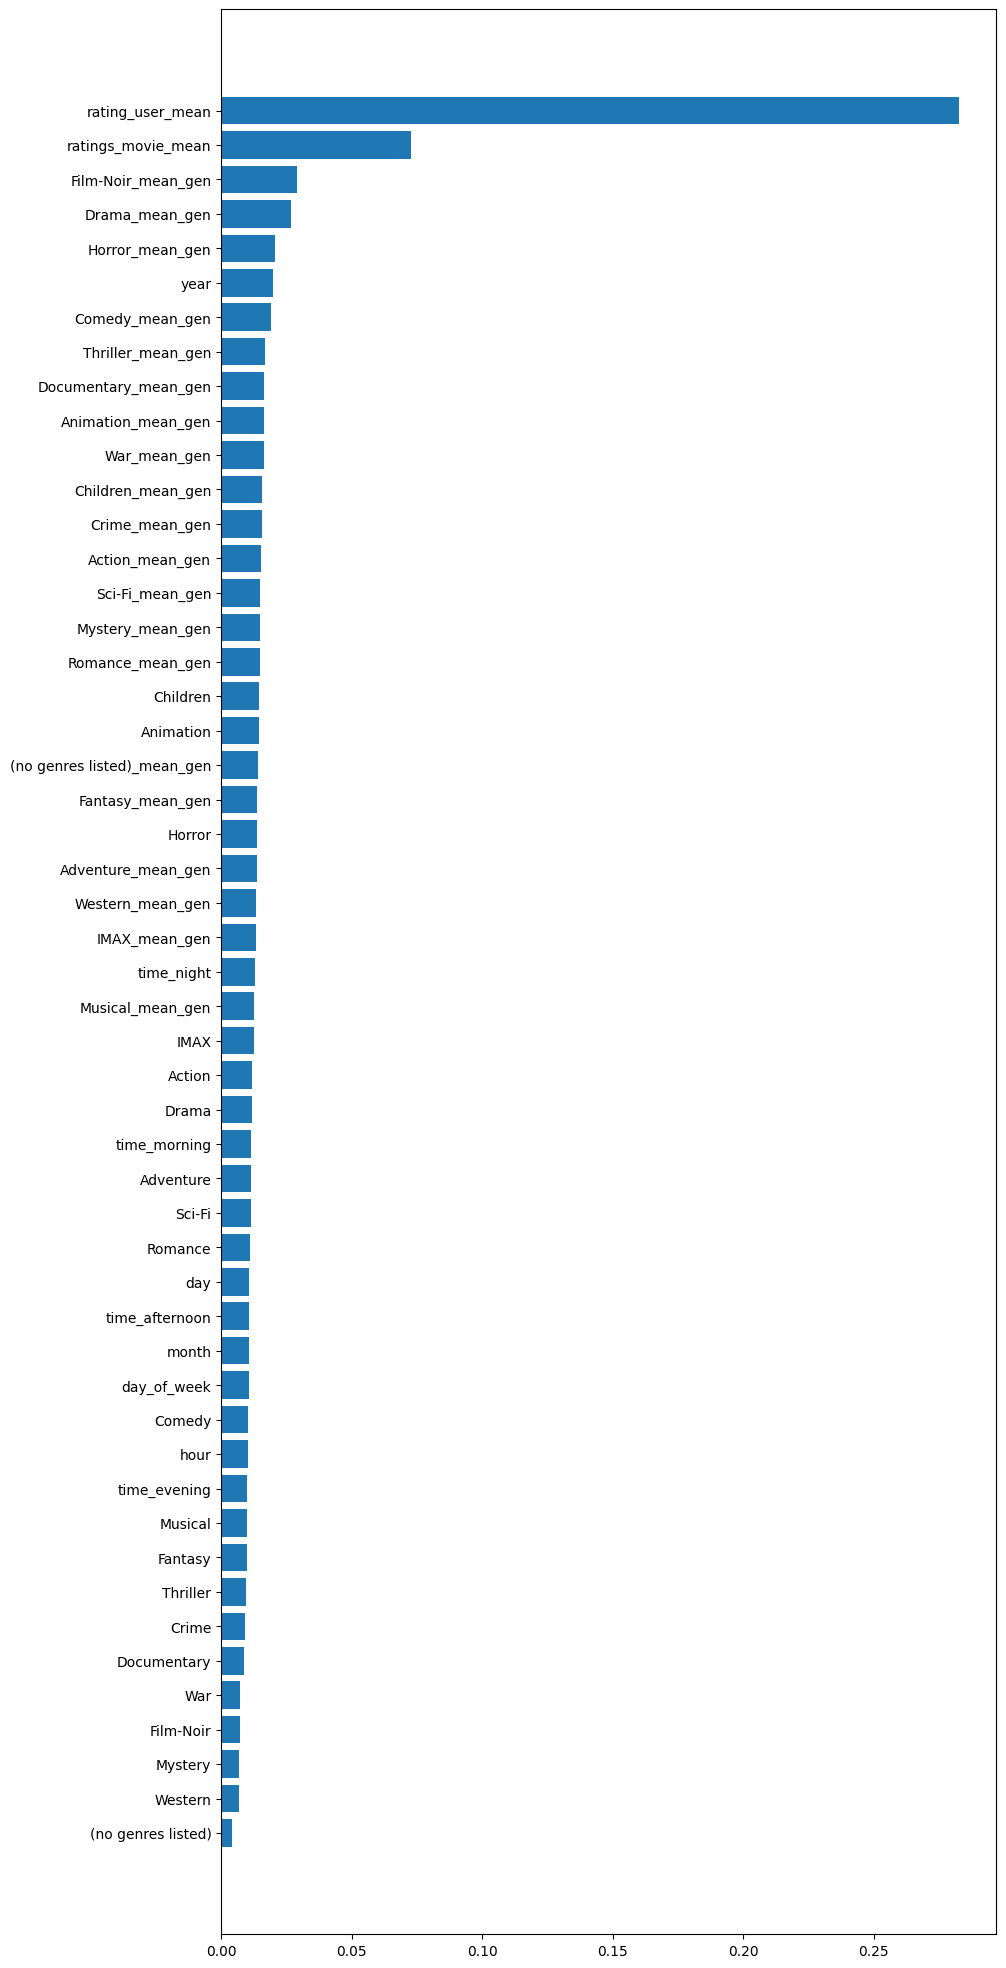

In [121]:
import matplotlib.pyplot as plt

best_model.feature_importances_
sorted_idx = best_model.feature_importances_.argsort()
plt.figure(figsize=(10,25))
plt.barh(X_test.columns[sorted_idx], best_model.feature_importances_[sorted_idx])

In [134]:
print(ratings_df[ratings_df["userId"] == 2].merge(movies_df, how="left", on="movieId")[["movieId", "rating", "title"]].to_string())

     movieId  rating                                                                                           title
0          1     3.5                                                                                Toy Story (1995)
1         62     0.5                                                                       Mr. Holland's Opus (1995)
2        110     5.0                                                                               Braveheart (1995)
3        150     4.0                                                                                Apollo 13 (1995)
4        151     4.5                                                                                  Rob Roy (1995)
5        236     4.0                                                                              French Kiss (1995)
6        260     5.0                                                       Star Wars: Episode IV - A New Hope (1977)
7        261     0.5                                            

In [152]:
df[df["userId"]==2].iloc[3]

userId                                        2
movieId                                     150
rating                                      4.0
rating_user_mean                       3.630435
year                                       2006
month                                         3
day                                           3
day_of_week                                   4
hour                                         19
time_afternoon                            False
time_evening                               True
time_morning                              False
time_night                                False
title                          Apollo 13 (1995)
ratings_movie_mean                     3.873556
(no genres listed)                            0
Action                                        0
Adventure                                     1
Animation                                     0
Children                                      0
Comedy                                  

In [153]:
best_model.predict([df[df["userId"]==2].iloc[3].drop(["userId", "movieId", "title", "rating"])])

array([4.252848], dtype=float32)

In [154]:
movies_df[movies_df["movieId"]==150]

,movieId,title,genres,ratings_movie_mean
148,150,Apollo 13 (1995),Adventure|Drama|IMAX,3.873556
